In [53]:
import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('data/raw/train.csv')
df

,Company_ID,Product_ID,Target,Date,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,...,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18
0,3,10395,1,2021-09-12,1,3689,2,2,0.0,1,...,NaN,NaN,1.0,1.0,136.800,136.800000,136.80,152.95,136.80,136.80
1,3,11303,10,2023-02-12,3,1736,2,2,2.0,3,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2499,2,2020-05-24,1,3572,1,2,0.0,4,...,NaN,2.493151,3.0,2.0,411.939,677.394667,830.28,908.60,830.28,830.28
3,3,3118,10,2019-07-12,3,1435,2,2,0.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,13044,6,2019-02-29,1,1263,0,2,0.0,3,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310945,2,13577,4,2020-03-13,1,7875,1,2,0.0,2,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5310946,2,1105,1,2022-01-05,1,6299,1,2,0.0,2,...,0.0,NaN,3.0,2.0,77.148,111.096000,151.74,104.28,104.40,104.40
5310947,3,3896,1,2020-09-17,1,3817,2,2,2.0,2,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5310948,1,3097,1,2023-11-01,1,7873,0,2,2.0,3,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.columns

Index(['Company_ID', 'Product_ID', 'Target', 'Date', 'cat_0', 'cat_1', 'cat_2',
       'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8', 'cat_9', 'cat_10',
       'cat_11', 'cat_12', 'cat_13', 'cat_14', 'num_0', 'num_1', 'num_2',
       'num_3', 'num_4', 'num_5', 'num_6', 'num_7', 'num_8', 'num_9', 'num_10',
       'num_11', 'num_12', 'num_13', 'num_14', 'num_15', 'num_16', 'num_17',
       'num_18'],
      dtype='object')

In [56]:
df[(df['Company_ID'] == 1) & (df['Product_ID'] == 1)].groupby('Date')['Date'].first().index == \
    df[(df['Company_ID'] == 1) & (df['Product_ID'] == 1)].groupby('Date')['Date'].first().index.sort_values()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Data is shuffled, but objects with one 'Company_ID' and 'Product_ID' are sorted by date

In [57]:
tmp = df.drop_duplicates()
1 - len(tmp) / len(df)

0.030131144145586042

We have ~3% duplicates in our data

In [58]:
df[(df['Company_ID'] == 1) & (df['Product_ID'] == 1)].sort_values(by='Date').groupby('Date')['Target'].median().value_counts().sort_index()

Target
1.0     74
2.0      2
3.0      4
4.0      2
5.0      2
6.0      3
8.0      5
9.0      2
10.0    10
10.5     1
12.0     2
15.0     2
16.0     1
Name: count, dtype: int64

<Axes: xlabel='Date', ylabel='Target'>

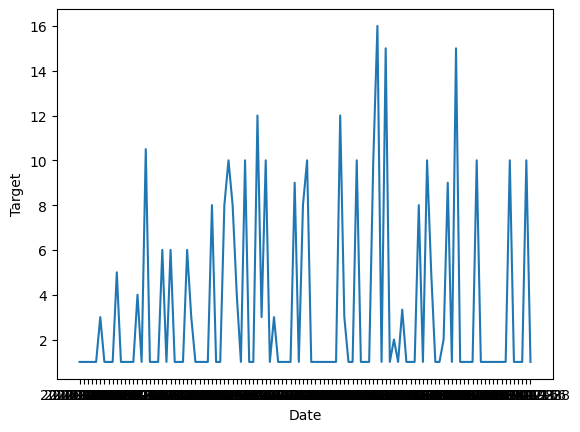

In [59]:
sns.lineplot(df[(df['Company_ID'] == 1) & (df['Product_ID'] == 1)].sort_values(by='Date').groupby('Date')['Target'].mean())

Nothing special found

In [60]:
test_df = pd.read_csv('data/raw/sample_submission.csv')
test_df

,Id,Target
0,0_1_2024-01,0
1,0_2_2024-01,0
2,0_3_2024-01,0
3,0_5_2024-01,0
4,0_6_2024-01,0
...,...,...
113851,3_14664_2024-03,0
113852,3_14665_2024-03,0
113853,3_14666_2024-03,0
113854,3_14667_2024-03,0


It seems that 'Id' in test part has the format of '{Company_ID}\_{Product_ID}\_{year}-{month}'

In [61]:
test_df['Company_ID'] = test_df['Id'].apply(lambda x: x[:x.find('_')]).astype(int)
test_df['Product_ID'] = test_df['Id'].apply(lambda x: x[x.find('_') + 1:x.rfind('_')]).astype(int)
test_df['Date'] = pd.to_datetime(test_df['Id'].apply(lambda x: x[x.rfind('_') + 1:]))
test_df = test_df.drop(columns=['Id'], axis=1)
test_df

,Target,Company_ID,Product_ID,Date
0,0,0,1,2024-01-01
1,0,0,2,2024-01-01
2,0,0,3,2024-01-01
3,0,0,5,2024-01-01
4,0,0,6,2024-01-01
...,...,...,...,...
113851,0,3,14664,2024-03-01
113852,0,3,14665,2024-03-01
113853,0,3,14666,2024-03-01
113854,0,3,14667,2024-03-01


In [62]:
df['Target'].describe()

count    5.310950e+06
mean     7.451920e+00
std      4.326484e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      6.560000e+03
Name: Target, dtype: float64

In [63]:
(df['Target'] % 1 != 0).sum()

0

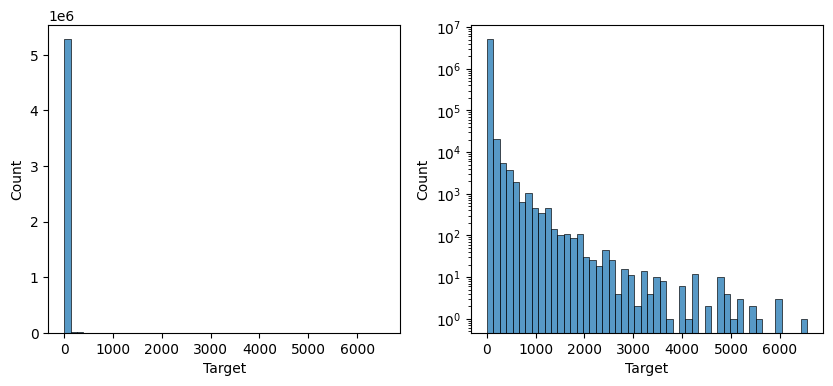

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.histplot(df['Target'], bins=50, ax=ax[0])

sns.histplot(df['Target'], bins=50, ax=ax[1])
ax[1].set_yscale('log')

The target is a natural number and it has an extremely uneven distribution

In [65]:
df['Date'].min(), df['Date'].max()

('2019-01-02', '2023-12-30')

### 'Company_ID'

<Axes: xlabel='Company_ID', ylabel='Count'>

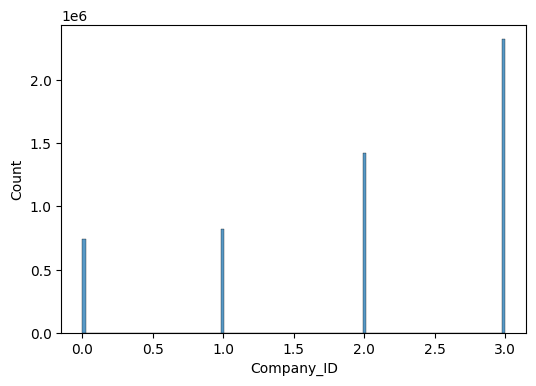

In [66]:
fig = plt.figure(figsize=(6, 4), dpi=100)
sns.histplot(df['Company_ID'])

### 'Product_ID'

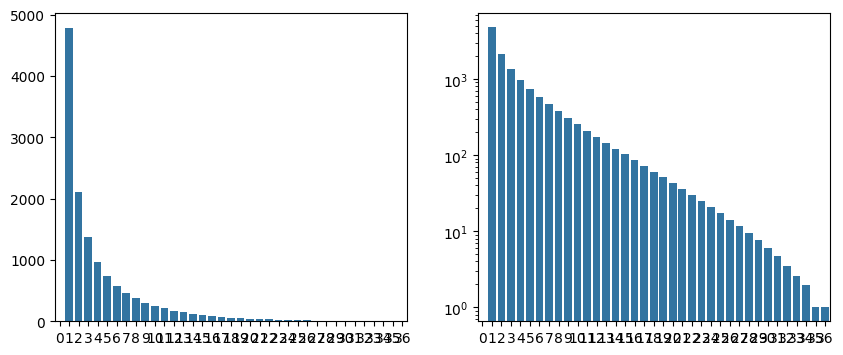

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.barplot(df['Product_ID'].value_counts().rolling(400, step=400).mean().to_numpy(), ax=ax[0])

sns.barplot(df['Product_ID'].value_counts().rolling(400, step=400).mean().to_numpy(), ax=ax[1])
ax[1].set_yscale('log')

If we sort 'Product_ID' by value counts, its distribution is very similar to exponential

## Categorical features 'cat_0', 'cat_1', ..., 'cat_14'

### 'cat_0'

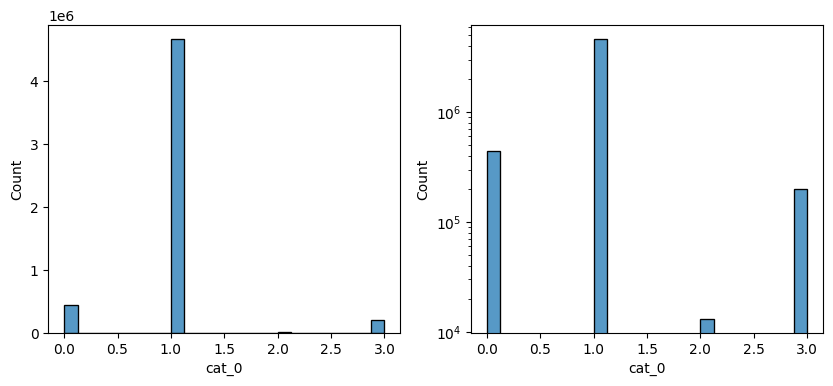

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.histplot(df['cat_0'], ax=ax[0])

sns.histplot(df['cat_0'], ax=ax[1])
ax[1].set_yscale('log')

In [69]:
print(df[df['cat_0'] == 0]['Target'].mean(), df[df['cat_0'] != 0]['Target'].mean())
print(df[df['cat_0'] == 1]['Target'].mean(), df[df['cat_0'] != 1]['Target'].mean())
print(df[df['cat_0'] == 2]['Target'].mean(), df[df['cat_0'] != 2]['Target'].mean())
print(df[df['cat_0'] == 3]['Target'].mean(), df[df['cat_0'] != 3]['Target'].mean())

8.160676896082341 7.387538881047409
6.257532661061561 15.930354123048724
11.188626168934844 7.442642479506104
33.38970067171702 6.4349164319895555


Seems that 'cat_0' is great categorical feature

**TODO: explore 'cat_0' in more detail**

### 'cat_1'

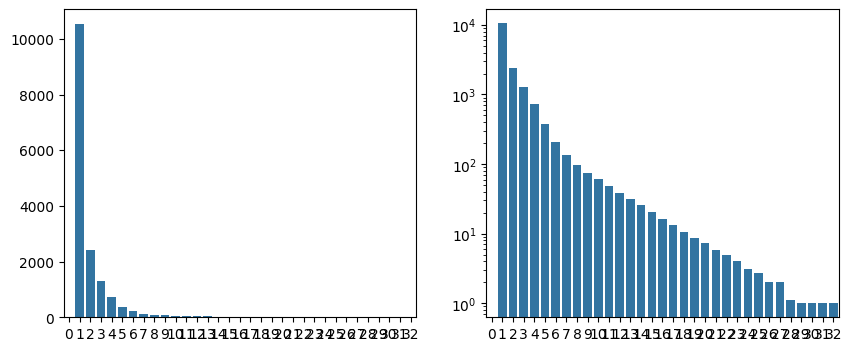

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.barplot(df['cat_1'].value_counts().rolling(300, step=300).mean().to_numpy(), ax=ax[0])

sns.barplot(df['cat_1'].value_counts().rolling(300, step=300).mean().to_numpy(), ax=ax[1])
ax[1].set_yscale('log')

If we sort 'cat_1' by value counts, its distribution is very similar to exponential

In [71]:
df.groupby('cat_1')['Target'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
cat_1,,
5085,1.00,9
5829,1.00,6
5828,1.00,34
5827,1.00,2
5825,1.00,1
...,...,...
6797,1460.00,1
1330,1488.50,230
2104,1499.36,275


Seems that 'cat_1' is great categorical feature

**TODO: explore 'cat_1' in more detail**

### 'cat_2'

<Axes: xlabel='cat_2', ylabel='Count'>

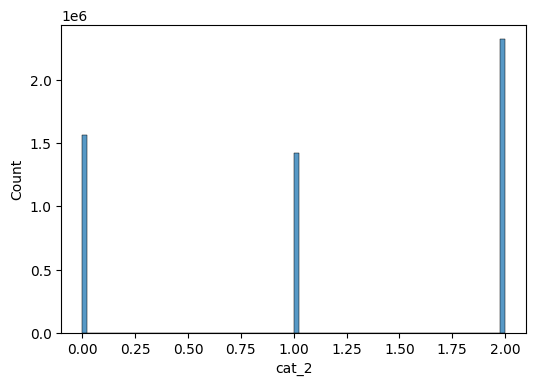

In [73]:
fig = plt.figure(figsize=(6, 4), dpi=100)
sns.histplot(df['cat_2'])

In [75]:
print(df[df['cat_2'] == 0]['Target'].mean(), df[df['cat_2'] != 0]['Target'].mean())
print(df[df['cat_2'] == 1]['Target'].mean(), df[df['cat_2'] != 1]['Target'].mean())
print(df[df['cat_2'] == 2]['Target'].mean(), df[df['cat_2'] != 2]['Target'].mean())

11.941953357639429 5.580178258388493
3.2719503744083673 8.985791074617385
6.997033577406623 7.8054825389930755


Seems that 'cat_2' is just a usual categorical feature

### 'cat_3'

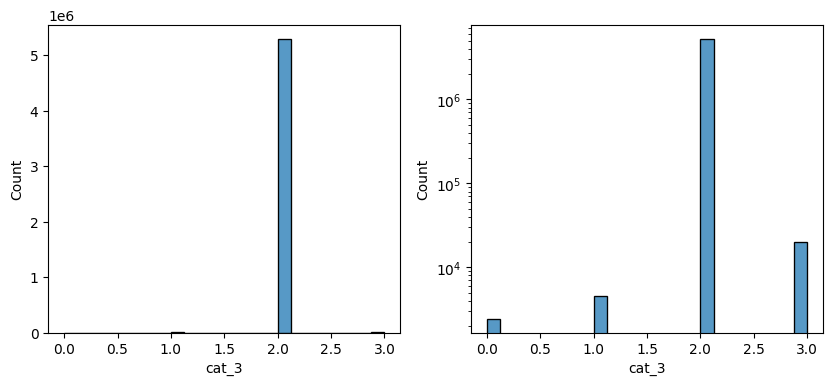

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.histplot(df['cat_3'], ax=ax[0])

sns.histplot(df['cat_3'], ax=ax[1])
ax[1].set_yscale('log')

In [78]:
print(df[df['cat_3'] == 0]['Target'].mean(), df[df['cat_3'] != 0]['Target'].mean())
print(df[df['cat_3'] == 1]['Target'].mean(), df[df['cat_3'] != 1]['Target'].mean())
print(df[df['cat_3'] == 2]['Target'].mean(), df[df['cat_3'] != 2]['Target'].mean())
print(df[df['cat_3'] == 3]['Target'].mean(), df[df['cat_3'] != 3]['Target'].mean())

12.218673218673219 7.449726928922401
5.515379508740872 7.453568886507711
7.050544059179589 86.10142401542683
113.32411897025743 7.0516181891892655


Seems that 'cat_3' is great categorical feature

**TODO: explore 'cat_3' in more detail**

### 'cat_4'

<Axes: xlabel='cat_4', ylabel='Count'>

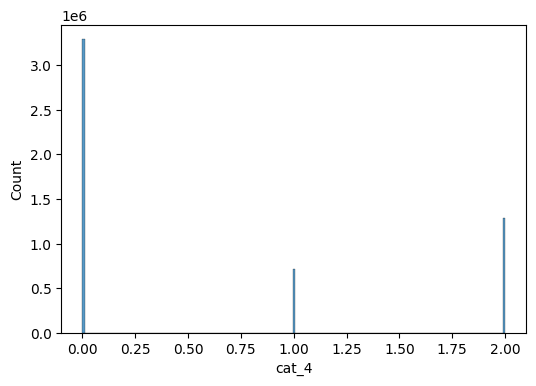

In [79]:
fig = plt.figure(figsize=(6, 4), dpi=100)
sns.histplot(df['cat_4'])

In [80]:
print(df[df['cat_4'] == 0]['Target'].mean(), df[df['cat_4'] != 0]['Target'].mean())
print(df[df['cat_4'] == 1]['Target'].mean(), df[df['cat_4'] != 1]['Target'].mean())
print(df[df['cat_4'] == 2]['Target'].mean(), df[df['cat_4'] != 2]['Target'].mean())

8.792290185060118 5.269752247036445
5.7143160195784235 7.720846435403442
4.875636961826908 8.277371796385822


Seems that 'cat_4' is just a usual categorical feature

### 'cat_5'

<Axes: xlabel='cat_5', ylabel='Count'>

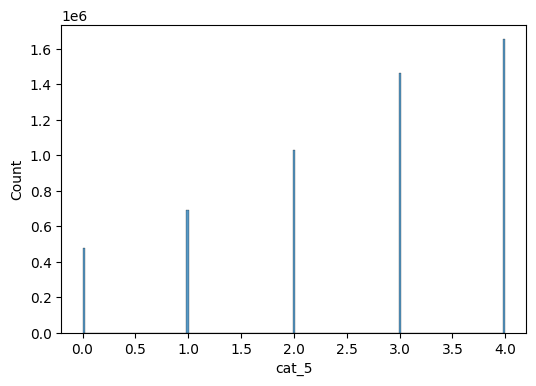

In [81]:
fig = plt.figure(figsize=(6, 4), dpi=100)
sns.histplot(df['cat_5'])

Interesting distribution

In [82]:
print(df[df['cat_5'] == 0]['Target'].mean(), df[df['cat_5'] != 0]['Target'].mean())
print(df[df['cat_5'] == 1]['Target'].mean(), df[df['cat_5'] != 1]['Target'].mean())
print(df[df['cat_5'] == 2]['Target'].mean(), df[df['cat_5'] != 2]['Target'].mean())
print(df[df['cat_5'] == 3]['Target'].mean(), df[df['cat_5'] != 3]['Target'].mean())
print(df[df['cat_5'] == 4]['Target'].mean(), df[df['cat_5'] != 4]['Target'].mean())

2.862398481084653 7.906089828613901
2.046725664743573 8.258369692883338
2.2946281228818957 8.69028371230368
21.136444261865915 2.24906437364035
2.127591154267588 9.855556314702056


Seems that 'cat_5' is great categorical feature

**TODO: explore 'cat_5' in more detail**

### 'cat_6'

<Axes: xlabel='cat_6', ylabel='Count'>

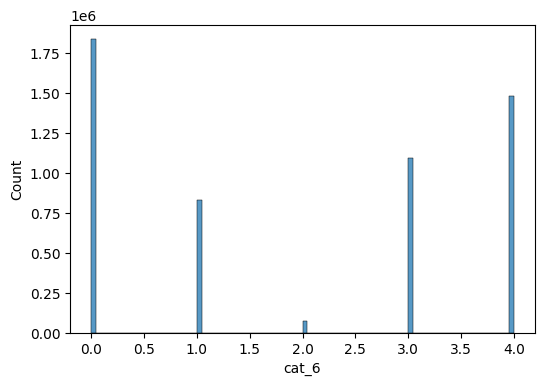

In [83]:
fig = plt.figure(figsize=(6, 4), dpi=100)
sns.histplot(df['cat_6'])

In [84]:
print(df[df['cat_6'] == 0]['Target'].mean(), df[df['cat_6'] != 0]['Target'].mean())
print(df[df['cat_6'] == 1]['Target'].mean(), df[df['cat_6'] != 1]['Target'].mean())
print(df[df['cat_6'] == 2]['Target'].mean(), df[df['cat_6'] != 2]['Target'].mean())
print(df[df['cat_6'] == 3]['Target'].mean(), df[df['cat_6'] != 3]['Target'].mean())
print(df[df['cat_6'] == 4]['Target'].mean(), df[df['cat_6'] != 4]['Target'].mean())

8.05573833925102 7.133183738462136
4.434919616620173 8.012659414937467
1.7762797496558478 7.528233730949051
5.416527134656265 7.977502234661621
10.16337199385405 6.4012174944882


Seems that 'cat_6' is just a usual categorical feature

### 'cat_7'

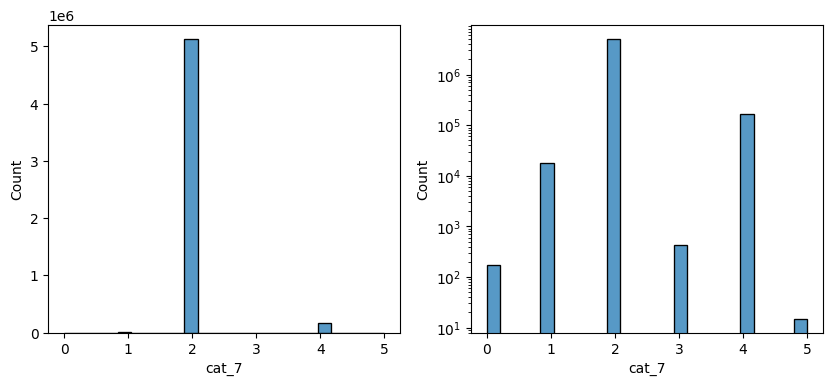

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.histplot(df['cat_7'], ax=ax[0])

sns.histplot(df['cat_7'], ax=ax[1])
ax[1].set_yscale('log')

In [87]:
print(df[df['cat_7'] == 0]['Target'].mean(), df[df['cat_7'] != 0]['Target'].mean())
print(df[df['cat_7'] == 1]['Target'].mean(), df[df['cat_7'] != 1]['Target'].mean())
print(df[df['cat_7'] == 2]['Target'].mean(), df[df['cat_7'] != 2]['Target'].mean())
print(df[df['cat_7'] == 3]['Target'].mean(), df[df['cat_7'] != 3]['Target'].mean())
print(df[df['cat_7'] == 4]['Target'].mean(), df[df['cat_7'] != 4]['Target'].mean())
print(df[df['cat_7'] == 5]['Target'].mean(), df[df['cat_7'] != 5]['Target'].mean())

2.659090909090909 7.4520785482492755
2.333876496038658 7.469127946991141
7.330799436313297 10.773897777087894
13.06378132118451 7.451455801522679
11.669133016627079 7.313821158763648
2.2666666666666666 7.451934358074426


Seems that 'cat_7' is just a usual categorical feature

### 'cat_8'

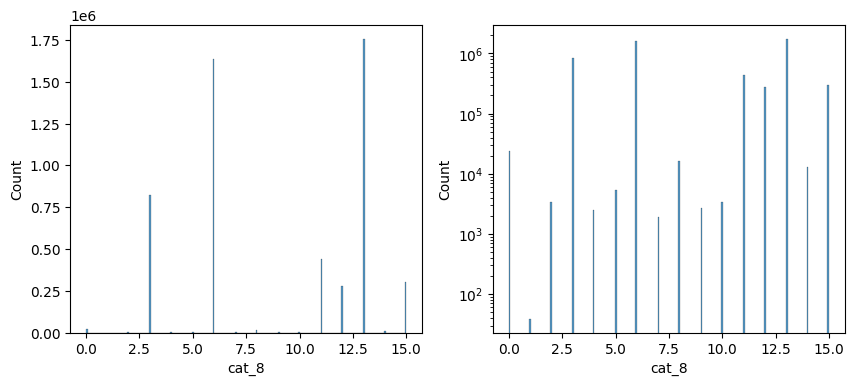

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.histplot(df['cat_8'], ax=ax[0])

sns.histplot(df['cat_8'], ax=ax[1])
ax[1].set_yscale('log')

In [91]:
df.groupby('cat_8')['Target'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
cat_8,,
1,1.128205,39
7,1.270657,1888
14,1.803570,12773
8,1.838027,16441
5,2.046580,5453
12,2.172349,281121
9,2.601560,2693
11,2.685670,441078
15,3.391527,301295


Seems that 'cat_8' is great categorical feature

**TODO: explore 'cat_8' in more detail**

### 'cat_9'

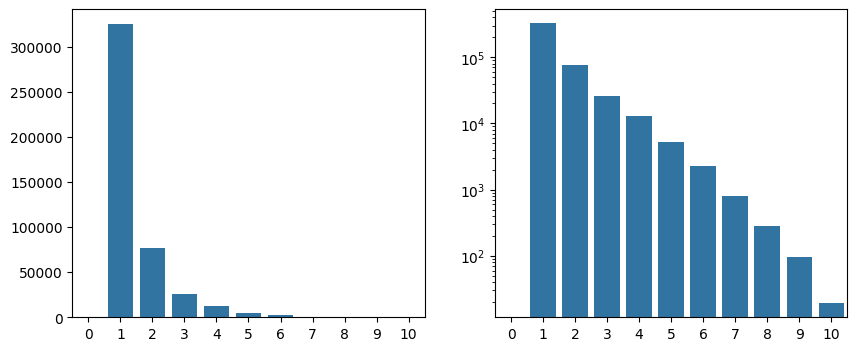

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.barplot(df['cat_9'].value_counts().rolling(10, step=10).mean().to_numpy(), ax=ax[0])

sns.barplot(df['cat_9'].value_counts().rolling(10, step=10).mean().to_numpy(), ax=ax[1])
ax[1].set_yscale('log')

If we sort 'cat_9' by value counts, its distribution is very similar to exponential

In [94]:
df.groupby('cat_9')['Target'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
cat_9,,
31,1.000000,1
13,1.000000,2
34,1.000000,5
66,1.000000,14
35,1.000000,26
...,...,...
85,14.324005,5932
62,15.877586,8798
41,26.102667,724139


Seems that 'cat_9' is great categorical feature

**TODO: explore 'cat_9' in more detail**

### 'cat_10'

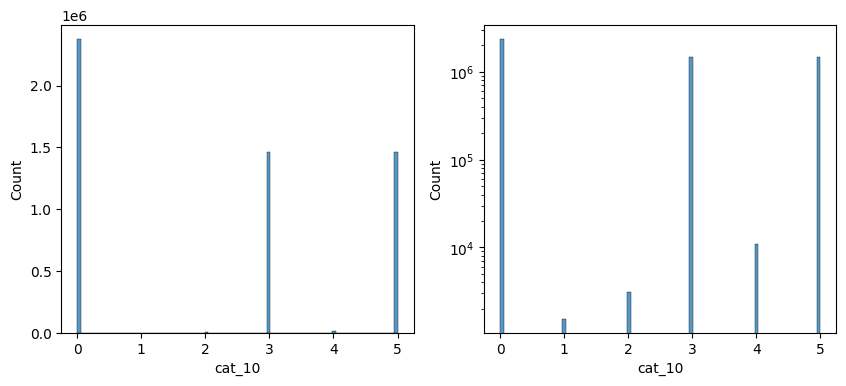

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.histplot(df['cat_10'], ax=ax[0])

sns.histplot(df['cat_10'], ax=ax[1])
ax[1].set_yscale('log')

In [97]:
print(df[df['cat_10'] == 0]['Target'].mean(), df[df['cat_10'] != 0]['Target'].mean())
print(df[df['cat_10'] == 1]['Target'].mean(), df[df['cat_10'] != 1]['Target'].mean())
print(df[df['cat_10'] == 2]['Target'].mean(), df[df['cat_10'] != 2]['Target'].mean())
print(df[df['cat_10'] == 3]['Target'].mean(), df[df['cat_10'] != 3]['Target'].mean())
print(df[df['cat_10'] == 4]['Target'].mean(), df[df['cat_10'] != 4]['Target'].mean())
print(df[df['cat_10'] == 5]['Target'].mean(), df[df['cat_10'] != 5]['Target'].mean())

2.1014612858675235 11.775249334110432
3.817593790426908 7.452977961368169
1.6990168093878846 7.455337120089559
2.4761389279568524 9.344191368946754
22.96875 7.419503430078956
21.050658568244046 2.3041002097566836


Seems that 'cat_10' is great categorical feature

**TODO: explore 'cat_10' in more detail**

### 'cat_11'

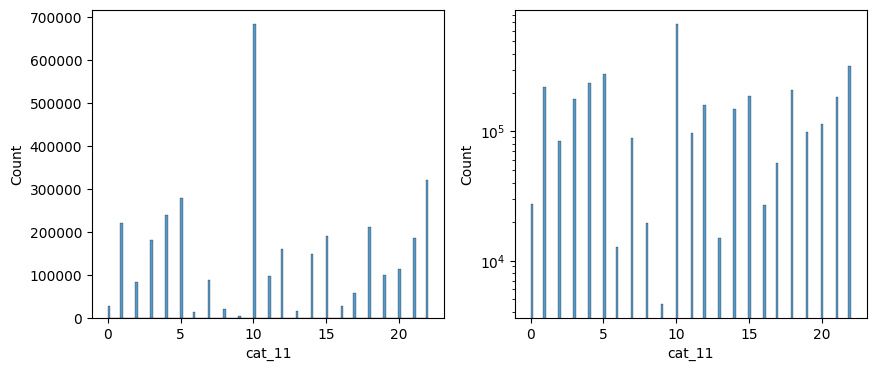

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.histplot(df['cat_11'], ax=ax[0])

sns.histplot(df['cat_11'], ax=ax[1])
ax[1].set_yscale('log')

In [101]:
df.groupby('cat_11')['Target'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
cat_11,,
9.0,1.432894,4627
18.0,1.642432,211160
4.0,1.652878,239103
0.0,1.701815,27379
19.0,1.758274,99315
16.0,1.789513,26776
6.0,1.799030,12778
12.0,1.909079,160458
3.0,1.920837,179755


Seems that 'cat_11' is great categorical feature

**TODO: explore 'cat_11' in more detail**

### 'cat_12'

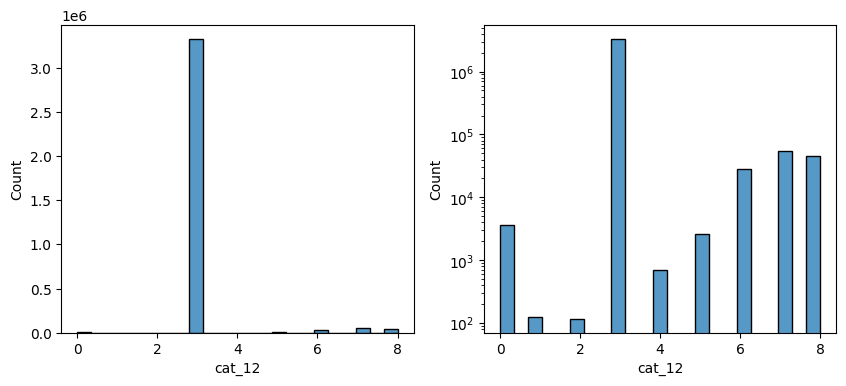

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.histplot(df['cat_12'], ax=ax[0])

sns.histplot(df['cat_12'], ax=ax[1])
ax[1].set_yscale('log')

In [104]:
df.groupby('cat_12')['Target'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
cat_12,,
4.0,1.258203,701
0.0,1.418937,3707
6.0,1.589662,28786
5.0,1.683992,2655
2.0,2.000000,118
7.0,2.261610,53637
8.0,2.264500,46034
1.0,2.496063,127
3.0,6.906268,3324883


Seems that 'cat_12' is just a usual categorical feature

### 'cat_13'

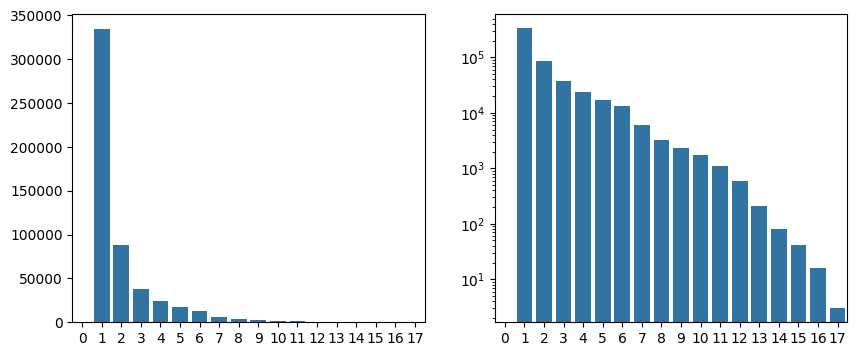

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.barplot(df['cat_13'].value_counts().rolling(5, step=5).mean().to_numpy(), ax=ax[0])

sns.barplot(df['cat_13'].value_counts().rolling(5, step=5).mean().to_numpy(), ax=ax[1])
ax[1].set_yscale('log')

If we sort 'cat_13' by value counts, its distribution is very similar to exponential

In [108]:
df.groupby('cat_13')['Target'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
cat_13,,
53.0,1.000000,1
56.0,1.000000,19
39.0,1.000000,6
67.0,1.000000,1
80.0,1.000000,2
...,...,...
70.0,4.337500,160
34.0,17.384562,809810
23.0,20.146830,37758


Seems that 'cat_13' is great categorical feature

**TODO: explore 'cat_13' in more detail**

### 'cat_14'

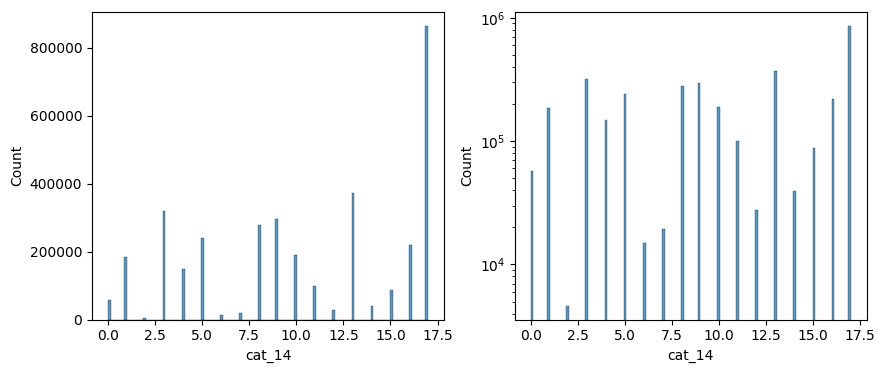

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.histplot(df['cat_14'], ax=ax[0])

sns.histplot(df['cat_14'], ax=ax[1])
ax[1].set_yscale('log')

In [111]:
df.groupby('cat_14')['Target'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
cat_14,,
2.0,1.432894,4627
5.0,1.652878,239103
12.0,1.701815,27379
13.0,1.757566,371618
11.0,1.758274,99315
14.0,1.792587,39554
6.0,1.931127,14926
10.0,2.006123,189621
0.0,2.078003,56754


Seems that 'cat_14' is great categorical feature

**TODO: explore 'cat_14' in more detail**